In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Prise des données

In [4]:
ns = 72     #n electrodes en surface
ne = 8      #n electrodes enterrées
zm = [-11, -11, -11, -11, -8, -8, -8, -8]    #profondeur max electrodes enterrées
spxs = 1.5  #distance interelectrode de surface
spxe = 6    #distance interelectrode de profondeur

In [5]:
a1 = 100 #dernière électrode de surface placée avant l'effondrement
a2 = 100 #première électrode de surface placée après l'effondrement

In [6]:
xse = [22,26, 30, 34, 38, 42, 46,50] #première électrode de surface à l'W de l'électrode enterrée lorsque l'on regarde le profil WE. Première électrode à gauche !
xsesim = []
for i in range(len(xse)) :
    xsesim.append(xse[i]+1)
xsetot = xsesim+xse
xsetot.sort()
xsetot

[22, 23, 26, 27, 30, 31, 34, 35, 38, 39, 42, 43, 46, 47, 50, 51]

## Réseau d'électrodes

### Réseau en surface

In [7]:
xs = np.arange(0, ns*spxs, spxs)
ys = np.zeros_like(xs)
zs = np.zeros_like(xs)
dfs = pd.DataFrame.from_dict({'X' : xs , 'Y' : ys , 'Z' :zs})
pd.set_option("max_rows", 5)
dfs

,X,Y,Z
0,0.0,0.0,0.0
1,1.5,0.0,0.0
...,...,...,...
70,105.0,0.0,0.0
71,106.5,0.0,0.0


### Réseau enterré

In [8]:
xe = []
for i in range (len(xse)) :
    xe.append(spxs*(xse[i]-1)+spxs/2)
xe

[32.25, 38.25, 44.25, 50.25, 56.25, 62.25, 68.25, 74.25]

In [9]:
ye = zm
ze = np.zeros_like(xe)
dfe = pd.DataFrame.from_dict({'X' : xe , 'Y' : ye , 'Z' :ze})
pd.set_option("max_rows", 5)
# pd.reset_option('display.max_rows')
dfe

,X,Y,Z
0,32.25,-11,0.0
1,38.25,-11,0.0
...,...,...,...
6,68.25,-8,0.0
7,74.25,-8,0.0


### Réseau d'électrode global

In [10]:
dfse=dfs.append(dfe,ignore_index=True)
dfse

,X,Y,Z
0,0.00,0.0,0.0
1,1.50,0.0,0.0
...,...,...,...
78,68.25,-8.0,0.0
79,74.25,-8.0,0.0


In [11]:
dfse1 = dfse.drop('Z', 'columns')

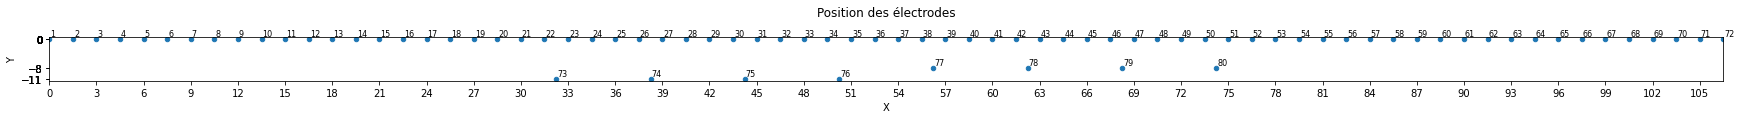

In [10]:
fig, ax = plt.subplots()
dfse.plot.scatter(x='X', y='Y', title='Position des électrodes\n', grid=False, yticks=dfse['Y'], xticks=dfs['X']*2, figsize=(30,0.8), ax=ax,
                  xlim=(dfs.at[0, 'X'], dfs.at[len(dfs)-1, 'X']))
for k, v in dfse1.iterrows():
   ax.annotate(k+1, v, xytext=(1,3), textcoords='offset points', fontsize=8)
plt.show()

## Séquences de mesures (quadripôle)

### Une électrode enterrée

#### Dispositif AbMN

In [13]:
seq=[]

i=0
k=0
for k, v in zip(xse, range(ns+1, ns+ne+1)) :
    for w in range(0, 6) :
        for i in range(1, ns+1) :
            A = k
            B = v
            M = i
            N = i+1+2*w
            if a1<M<a2 or a1<N<a2 or M==k or N==k or N>ns or (N>k and M<k) or M<1 :
                pass
            else :
                seq.append([A,B,M,N])
df_seqtest6=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest6

,A,B,M,N
0,22,73,1,2
1,22,73,2,3
...,...,...,...,...
2830,50,80,60,71
2831,50,80,61,72


In [18]:
with open('aa6.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aa6.dat', sep=' ', mode='a', index=False)

with open('aa6.dat', mode='a') as file : 
    file.write(f'{len(df_seqtest6)}\n')
    file.write('# ')
    
df_seqtest6.to_csv('aa6.dat', sep=' ', mode='a', index=False)

In [20]:
# df2=pd.DataFrame()
# df2['A-B'] = df_seqtest6[['A', 'B']].astype(str).agg('-'.join, axis=1)
# df2['M-N'] = df_seqtest6[['M', 'N']].astype(str).agg('-'.join, axis=1)

#df2.plot.scatter('A-B', 'M-N', ylim=(df2.at[0, 'M-N'], df2.at[len(df2)-1, 'M-N']), figsize=(10,70))

#### Dispositif AMnB

In [12]:
seq=[]

i=0
k=0
for k, v in zip(xse, range(ns+1, ns+ne+1)) :
    for i in range(0, min(k-1,ns-k)) :
        for j in range(0,2) :
            A = k-1-i+j
            B = k+1+i+j
            M = k+j
            N = v
            if a1<B<a2 or a1<A<a2 or B>ns:
                pass
            else :
                seq.append([A,B,M,N])
df_seqtest4sim=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest4sim

,A,B,M,N
0,21,23,22,73
1,22,24,23,73
...,...,...,...,...
434,30,72,51,80
435,28,72,50,80


In [50]:
with open('aa4sim.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aa4sim.dat', sep=' ', mode='a', index=False)

with open('aa4sim.dat', mode='a') as file : 
    file.write(f'{len(df_seqtest4sim)}\n')
    file.write('# ')
    
df_seqtest4sim.to_csv('aa4sim.dat', sep=' ', mode='a', index=False)

### Deux électrodes enterrées

#### Dispositif AmBn

In [23]:
seq=[]
#A et B mobiles
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    for i in range(0, min(xse[k]+1,ns-xse[k+1]+1)) :
        A = xse[k]-i+1
        B = xse[k+1]+i
        M = v
        N = v+1
        if a1<B<a2 or a1<A<a2 :
            pass
        else :
            seq.append([A,B,M,N])

#A mobile
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    for i in range(0, min(xse[k]+1,ns-xse[k+1]+1)) :
        A = xse[k]-i+1
        B = xse[k+1]
        M = v
        N = v+1
        if a1<B<a2 or a1<A<a2 :
            pass
        else :
            seq.append([A,B,M,N])

#B mobile
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    for i in range(0, min(xse[k]+1,ns-xse[k+1]+1)) :
        A = xse[k]+1
        B = xse[k+1]+i
        M = v
        N = v+1
        if a1<B<a2 or a1<A<a2 :
            pass
        else :
            seq.append([A,B,M,N])
            
df_seqtest13=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest13.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
df_seqtest13

,A,B,M,N
0,23,26,73,74
1,22,27,73,74
...,...,...,...,...
575,47,71,79,80
576,47,72,79,80


In [37]:
with open('aa13.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aa13.dat', sep=' ', mode='a', index=False)

with open('aa13.dat', mode='a') as file : 
    file.write(f'{len(df_seqtest13)}\n')
    file.write('# ')
    
df_seqtest13.to_csv('aa13.dat', sep=' ', mode='a', index=False)

In [18]:
# df13=pd.DataFrame()
# df13['A-B'] = df_seqtest13[['A', 'B']].astype(str).agg('-'.join, axis=1)
# df13['M-N'] = df_seqtest13[['M', 'N']].astype(str).agg('-'.join, axis=1)

# df13.plot.scatter('A-B', 'M-N', figsize=(40,5))
                 #ylim=(df12.at[0, 'A-B'], df12.at[len(df12)-1, 'A-B']))

In [21]:
#Avec une boucle en plus sur les électrodes potentiel enterrées
#2 mobiles
# seq=[]
# a=ne
# for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
#     i=0
#     a -=1
#     while i < a :
#         for j in range(0, min(xse[k]+1,ns-xse[k+1]+1)) :
#             A = xse[k]-j+1
#             M = v
#             B = xse[k+1+i] +j
#             N = v+1+i
#             if a1<A<a2 or a1<B<a2 or N>ns+ne :
#                 pass
#             else :
#                 seq.append([A,B,M,N])
#         i += 1
        
# #1 mobile g
# a=ne
# for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
#     i=0
#     a -=1
#     while i < a :
#         for j in range(0, min(xse[k]+1,ns-xse[k+1]+1)) :
#             A = xse[k]-j+1
#             M = v
#             B = xse[k+1+i]
#             n = v+1+i
#             if a1<A<a2 or a1<B<a2 or N>ns+ne :
#                 pass
#             else :
#                 seq.append([A,B,M,N])
#         i += 1

# #1 mobile d
# a=ne
# for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
#     i=0
#     a -=1
#     while i < a :
#         for j in range(0, min(xse[k]+1,ns-xse[k+1]+1)) :
#             A = xse[k]+1
#             M = v
#             B = xse[k+1+i] +j
#             N = v+1+i
#             if a1<A<a2 or a1<B<a2 or N>ns+ne :
#                 pass
#             else :
#                 seq.append([A,B,M,N])
#         i += 1


# df_seqtest13_1=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
# df_seqtest13_1.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
# df_seqtest13_1

In [20]:
# with open('aa132.dat', mode='w+') as file : 
#     file.write(f'{len(dfse)}\n')
#     file.write('# ')

# dfse.to_csv('aa132.dat', sep=' ', mode='a', index=False)

# with open('aa132.dat', mode='a') as file : 
#     file.write(f'{len(df_seqtest13_1)}\n')
#     file.write('# ')
    
# df_seqtest13_1.to_csv('aa132.dat', sep=' ', mode='a', index=False)

#### Dispositif AbMn

In [24]:
#A et M mobiles
seq=[]
a=ne
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 6) :
            A = xse[k]+1-j
            B = v
            M = xse[k+1+i] +j
            N = v+1+i
            if a1<A<a2 or a1<M<a2 or M>ns :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1
df_seqtest92mob=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest92mob

,A,B,M,N
0,23,73,26,74
1,22,73,27,74
...,...,...,...,...
166,43,79,54,80
167,42,79,55,80


In [25]:
#A mobile
seq=[]
a=ne
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 6) :
            A = xse[k]+1-j
            B = v
            M = xse[k+1+i]
            N = v+1+i
            if a1<A<a2 or a1<M<a2 or M>ns :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1
df_seqtest91mobg=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest91mobg

,A,B,M,N
0,23,73,26,74
1,22,73,26,74
...,...,...,...,...
166,43,79,50,80
167,42,79,50,80


In [26]:
#M mobile
seq=[]
a=ne
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 6) :
            A = xse[k]+1
            B = v
            M = xse[k+1+i] +j
            N = v+1+i
            if a1<A<a2 or a1<M<a2 or M>ns :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1
df_seqtest91mobd=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest91mobd

,A,B,M,N
0,23,73,26,74
1,23,73,27,74
...,...,...,...,...
166,47,79,54,80
167,47,79,55,80


In [27]:
df_9total=df_seqtest92mob.append(df_seqtest91mobg, ignore_index=True)
df_9total=df_9total.append(df_seqtest91mobd, ignore_index=True)
df_9total.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
df_9total

,A,B,M,N
0,23,73,26,74
1,22,73,27,74
...,...,...,...,...
446,47,79,54,80
447,47,79,55,80


In [26]:
with open('aa9.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aa9.dat', sep=' ', mode='a', index=False)

with open('aa9.dat', mode='a') as file : 
    file.write(f'{len(df_9total)}\n')
    file.write('# ')
    
df_9total.to_csv('aa9.dat', sep=' ', mode='a', index=False)

In [34]:
# df9=pd.DataFrame()
# df9['A-B'] = df_9total[['A', 'B']].astype(str).agg('-'.join, axis=1)
# df9['M-N'] = df_9total[['M', 'N']].astype(str).agg('-'.join, axis=1)

# #df9.plot.scatter('M-N', 'A-B', ylim=(df9.at[0, 'A-B'], df9.at[len(df9)-1, 'A-B']), figsize=(20,15))

#### Dispositif AnMb

In [28]:
#A et M mobiles
seq=[]
a=ne
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 11) :
            A = xse[k]-j+1
            N = v
            M = xse[k+1+i] +j
            B = v+1+i
            if a1<A<a2 or a1<M<a2 or M>ns :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1
df_seqtest82mob=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest82mob

,A,B,M,N
0,23,74,26,73
1,22,74,27,73
...,...,...,...,...
306,38,80,59,79
307,37,80,60,79


In [29]:
#A mobile
seq=[]
a=ne
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 11) :
            A = xse[k]-j+1
            N = v
            M = xse[k+1+i]
            B = v+1+i
            if a1<A<a2 or a1<M<a2 or M>ns :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1
df_seqtest81mobg=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest81mobg

,A,B,M,N
0,23,74,26,73
1,22,74,26,73
...,...,...,...,...
306,38,80,50,79
307,37,80,50,79


In [30]:
#M mobile
seq=[]
a=ne
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 11) :
            A = xse[k]+1
            N = v
            M = xse[k+1+i] +j
            B = v+1+i
            if a1<A<a2 or a1<M<a2 or M>ns :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1
df_seqtest81mobd=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest81mobd

,A,B,M,N
0,23,74,26,73
1,23,74,27,73
...,...,...,...,...
306,47,80,59,79
307,47,80,60,79


In [31]:
df_8total=df_seqtest82mob.append(df_seqtest81mobg, ignore_index=True)
df_8total=df_8total.append(df_seqtest81mobd, ignore_index=True)
df_8total.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
df_8total

,A,B,M,N
0,23,74,26,73
1,22,74,27,73
...,...,...,...,...
866,47,80,59,79
867,47,80,60,79


In [35]:
with open('aa8.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aa8.dat', sep=' ', mode='a', index=False)

with open('aa8.dat', mode='a') as file : 
    file.write(f'{len(df_8total)}\n')
    file.write('# ')
    
df_8total.to_csv('aa8.dat', sep=' ', mode='a', index=False)

### Trois électrodes enterrées

#### aNmb

In [32]:
seq = []
for k in (range(ns+1, ns+ne-1)) :
    for i in range(1, ns+1) :
        A = k
        B = k+2 
        M = k+1
        N = i
        if a1<N<a2 :
                pass
        else :
            seq.append([A,B,M,N])
df_seqtest15=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest15 #3 électrodes enterrées

,A,B,M,N
0,73,75,74,1
1,73,75,74,2
...,...,...,...,...
430,78,80,79,71
431,78,80,79,72


In [43]:
with open('aa15.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aa15.dat', sep=' ', mode='a', index=False)

with open('aa15.dat', mode='a') as file : 
    file.write(f'{len(df_seqtest15)}\n')
    file.write('# ')
    
df_seqtest15.to_csv('aa15.dat', sep=' ', mode='a', index=False)

In [33]:
# df15=pd.DataFrame()
# df15['A-B'] = df_seqtest15[['A', 'B']].astype(str).agg('-'.join, axis=1)
# df15['M-N'] = df_seqtest15[['M', 'N']].astype(str).agg('-'.join, axis=1)
# df15 = df15.sort_values(by=['A-B', 'M-N'])

# # df15.plot.scatter('A-B','M-N', figsize=(10,80))
# #                  #, xlim=(df2.at[0, 'M-N'], df2.at[len(df2)-1, 'M-N']))

### Quatre électrodes enterrées

In [36]:
seq=[]
maxSep = ne - 2

#wenner alpha
for sep in range(1, maxSep + 1):
            for i in range(1+ns,(ne - 2) - sep+1+ns):
                a = i
                m = a + sep
                n = m + sep
                b = n + sep
                if b > ne+ns :
                    pass
                else :
                    seq.append([a,b,m,n])
                    
#wenner beta
for sep in range(1, maxSep + 1):
    for i in range(1+ns,(ne - 2) - sep+1+ns):
        a = i
        b = a + sep
        m = b + sep
        n = m + sep
        if n > ne+ns :
            pass
        else :
            seq.append([a,b,m,n])


# schlumberger
for sep in range(1, maxSep + 1):
    for i in range(1+ns,(ne - 2) - sep+1+ns):
        a = i
        m = a + sep
        n = m + 1
        b = n + sep
        if b > ne+ns :
            pass
        else :
            seq.append([a,b,m,n])  
            
# dipole dipole
for space in range(0, ne-2) :
    for i in range(ns+1, ns+ne-2) :
        a = i
        b = a+1
        m = b+1+space
        n = m+1
        if n > ne+ns :
            pass
        else :
            seq.append([a,b,m,n])
df_seq4_enterres = pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seq4_enterres.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
df_seq4_enterres #4 électrodes enterrées

,A,B,M,N
0,73,76,74,75
1,74,77,75,76
...,...,...,...,...
26,74,75,79,80
27,73,74,79,80


In [47]:
with open('aa4enterres.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aa4enterres.dat', sep=' ', mode='a', index=False)

with open('aa4enterres.dat', mode='a') as file : 
    file.write(f'{len(df_seq4_enterres)}\n')
    file.write('# ')
    
df_seq4_enterres.to_csv('aa4enterres.dat', sep=' ', mode='a', index=False)

In [37]:
# df4_enterres=pd.DataFrame()
# df4_enterres['A-B'] = df_seq4_enterres[['A', 'B']].astype(str).agg('-'.join, axis=1)
# df4_enterres['M-N'] = df_seq4_enterres[['M', 'N']].astype(str).agg('-'.join, axis=1)
# df4_enterres = df4_enterres.sort_values(by=['A-B', 'M-N'])
# df4_enterres.plot.scatter('M-N','A-B', grid=True, figsize=(10,8))
#                  #, xlim=(df2.at[0, 'M-N'], df2.at[len(df2)-1, 'M-N']))

## Surface : Gradient + dipole-dipole + slm

In [49]:
# gradient
seq=[]
ab_sep_base = 12  # number of channels + 2   avant : 9
ev = 2
takeevery = 2
max_fak = int(np.ceil(ns / ab_sep_base))
ab_space = [ii*ab_sep_base for ii in range(max_fak) if ii % ev == 1]
mn_space = [ii for ii in range(max_fak) if ii % takeevery == 1]
for ab in range(len(ab_space)):  # ab spacings
    for aa in np.arange(1, ns-ab_space[ab]+1, 1):  # a index
        mn = mn_space[ab]
        for mm in np.arange(aa+mn, aa+ab_space[ab]-mn, mn):
            a=int(aa)
            b=int(aa+ab_space[ab])
            m=int(mm)
            n=int(mm+mn)
            seq.append([a,b,m,n])
grad = pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
grad

,A,B,M,N
0,1,13,2,3
1,1,13,3,4
2,1,13,4,5
3,1,13,5,6
4,1,13,6,7
...,...,...,...,...
1915,12,96,54,61
1916,12,96,61,68
1917,12,96,68,75
1918,12,96,75,82


In [50]:
with open('aagradsurf.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aagradsurf.dat', sep=' ', mode='a', index=False)

with open('aagradsurf.dat', mode='a') as file : 
    file.write(f'{len(grad)}\n')
    file.write('# ')
    
grad.to_csv('aagradsurf.dat', sep=' ', mode='a', index=False)

In [12]:
# dipole dipole
seq=[]
for space in range(1, ns-2) :
    for i in range(1, ns-2) :
        for j in range (1,8) :
            a = i
            b = a+j
            m = b+j*space
            n = m+j
            if n > ns :
                pass
            else :
                seq.append([a,b,m,n])
dip_dip = pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
dip_dip

,A,B,M,N
0,1,2,3,4
1,1,3,5,7
...,...,...,...,...
5544,2,3,71,72
5545,1,2,71,72


In [17]:
with open('aadip_dipsurf.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aadip_dipsurf.dat', sep=' ', mode='a', index=False)

with open('aadip_dipsurf.dat', mode='a') as file : 
    file.write(f'{len(dip_dip)}\n')
    file.write('# ')
    
dip_dip.to_csv('aadip_dipsurf.dat', sep=' ', mode='a', index=False)

In [41]:
#shlm
seq=[]
for sep in range(1, ns - 1):
    for i in range(1, ns-1):
        for j in range (1,4) :
            a = i
            m = a + j*sep
            n = m + j
            b = n + j*sep
            if b > ns :
                pass
            else :
                seq.append([a,b,m,n])
shl = pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
shl.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
shl

,A,B,M,N
0,1,4,2,3
1,1,7,3,5
...,...,...,...,...
2164,3,72,37,38
2165,1,72,36,37


In [42]:
with open('aashl.dat', mode='w+') as file : 
    file.write(f'{len(dfs)}\n')
    file.write('# ')

dfs.to_csv('aashl.dat', sep=' ', mode='a', index=False)

with open('aashl.dat', mode='a') as file : 
    file.write(f'{len(shl)}\n')
    file.write('# ')
    
shl.to_csv('aashl.dat', sep=' ', mode='a', index=False)